In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("./data_aman/data.csv")

In [5]:
df.head()

,a,d,fl,fw,gh,inl,inw,k,mt,pl,pw,sh,sl,sw,uf,freq,s11,gain,bandwidth
0,50.0,2000.0,75.0,58.0,15.0,80.0,3.625,1.0,15.0,250.0,350.0,90.0,400.0,460.0,0.8,0.38026,-39.578262,9.609153,0.031210
1,50.0,2000.0,75.0,58.0,15.0,80.0,3.625,1.0,15.0,250.0,326.0,90.0,400.0,460.0,0.8,0.38620,-27.972472,9.672313,0.031197
2,50.0,2000.0,75.0,58.0,15.0,80.0,3.625,1.0,15.0,250.0,303.0,90.0,400.0,460.0,0.8,0.39115,-24.776668,9.700339,0.033673
3,50.0,2000.0,75.0,58.0,15.0,80.0,3.625,1.0,15.0,250.0,280.0,90.0,400.0,460.0,0.8,0.39808,-21.830821,9.708912,0.032357
4,50.0,2000.0,75.0,58.0,15.0,58.0,3.625,1.0,15.0,250.0,350.0,90.0,400.0,460.0,0.8,0.38125,-24.694840,9.689270,0.031997


In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()

,a,d,fl,fw,gh,inl,inw,k,mt,pl,pw,sh,sl,sw,uf,freq,s11,gain,bandwidth
0,20.0,2000.0,110.0,58.0,15.0,20.0,3.625,1.0,15.0,180.0,350.0,90.0,400.0,460.0,0.8,0.78418,-19.665518,9.823703,0.102487
1,20.0,2000.0,98.0,58.0,15.0,20.0,3.625,1.0,15.0,204.0,303.0,90.0,400.0,460.0,0.8,0.41986,-21.376537,9.895503,0.036675
2,40.0,2000.0,110.0,58.0,15.0,20.0,3.625,1.0,15.0,180.0,326.0,90.0,400.0,460.0,0.8,0.79408,-20.411337,10.016174,0.245349
3,20.0,2000.0,86.0,58.0,15.0,39.0,3.625,1.0,15.0,228.0,350.0,90.0,400.0,460.0,0.8,0.38719,-32.809894,9.743107,0.032662
4,30.0,2000.0,98.0,58.0,15.0,39.0,3.625,1.0,15.0,204.0,280.0,90.0,400.0,460.0,0.8,0.42976,-21.872747,10.161677,0.037932


In [8]:
xcols = ['a', 'inl', 'pl', 'pw']
ycols = ['freq', 's11', 'gain']

data_x = df[xcols].values
data_y = df[ycols].values

In [9]:
def train_test_split(data: np.ndarray, tsp=0.8):
    train_size = round(tsp * len(data))
    return data[:train_size], data[train_size:]

In [10]:
train_x, test_x = train_test_split(data_x)
train_y, test_y = train_test_split(data_y)

In [11]:
from Scaler import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(train_x)
scaler_y.fit(train_y)

train_x_t = scaler_x.transform(train_x)
test_x_t = scaler_x.transform(test_x)

train_y_t = scaler_y.transform(train_y)
test_y_t = scaler_y.transform(test_y)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=train_x_t.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 12,995
Trainable params: 12,995
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(train_x_t, train_y_t, validation_split=0.1, epochs = 1000)

Epoch 1/1000
6/6 [==============================] - 1s 34ms/step - loss: 0.3098 - mae: 0.5007 - val_loss: 0.2565 - val_mae: 0.4558
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1696 - mae: 0.3628 - val_loss: 0.1324 - val_mae: 0.3193
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0949 - mae: 0.2571 - val_loss: 0.1046 - val_mae: 0.2669
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0964 - mae: 0.2577 - val_loss: 0.1015 - val_mae: 0.2623
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0791 - mae: 0.2327 - val_loss: 0.0942 - val_mae: 0.2562
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0724 - mae: 0.2208 - val_loss: 0.0953 - val_mae: 0.2554
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0684 - mae: 0.2136 - val_loss: 0.0873 - val_mae: 0.2409
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0628 - mae: 0.2

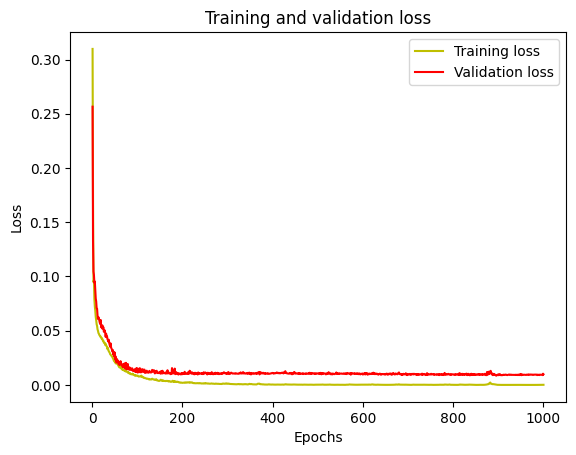

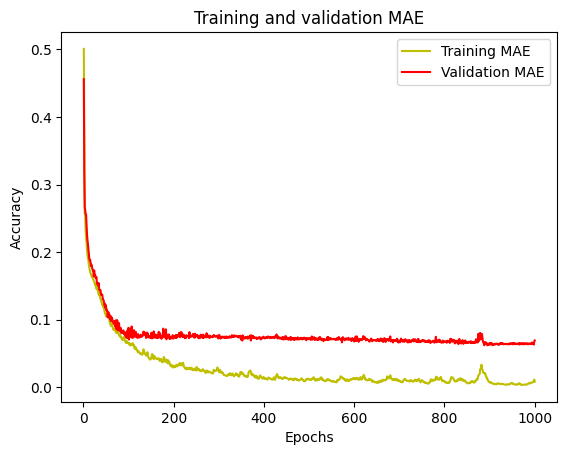

2/2 [==============================] - 0s 3ms/step - loss: 0.0173 - mae: 0.0801
MSE-NN:  0.017341207712888718
MAE-NN:  0.08008114248514175


In [20]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

mse_neural, mae_neural = model.evaluate(test_x_t, test_y_t)
print('MSE-NN: ', mse_neural)
print('MAE-NN: ', mae_neural)

In [21]:
pred_y_t = model.predict(test_x_t)
pred_y = scaler_y.inverse_transform(pred_y_t)

2/2 [==============================] - 0s 0s/step


In [22]:
pred_y[:5]

array([[  0.63437593, -27.148077  ,   9.551029  ],
       [  0.41900963, -13.738827  ,   9.777106  ],
       [  0.4573717 , -28.133022  ,   9.900463  ],
       [  0.3296045 , -16.029842  ,   9.707185  ],
       [  0.46245444, -33.422386  ,   9.520134  ]], dtype=float32)

In [23]:
test_y[:5]

array([[  0.7129    , -27.08085692,   9.87567297],
       [  0.39511   , -15.05551693,   9.79044484],
       [  0.40699   , -43.68789056,   9.7639217 ],
       [  0.37828   , -16.68998025,   9.70159638],
       [  0.41095   , -26.81536109,   9.76913228]])

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


def print_metrics(bar, model, x_test, y_test):
    predicted = model.predict(x_test)
    print(bar)

    display = PredictionErrorDisplay(y_true=y_test, y_pred=predicted)
    display.plot(kind="actual_vs_predicted")
    plt.show()

    print(f"R2 Score: {r2_score(y_test, predicted)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predicted)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predicted)}")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, predicted)}")
    print(f"Mean Absolute Error: {median_absolute_error(y_test, predicted)}")
    print(f"Explained Varaince Score: {explained_variance_score(y_test, predicted)}")

    print()

2/2 [==============================] - 0s 2ms/step
Neural Network


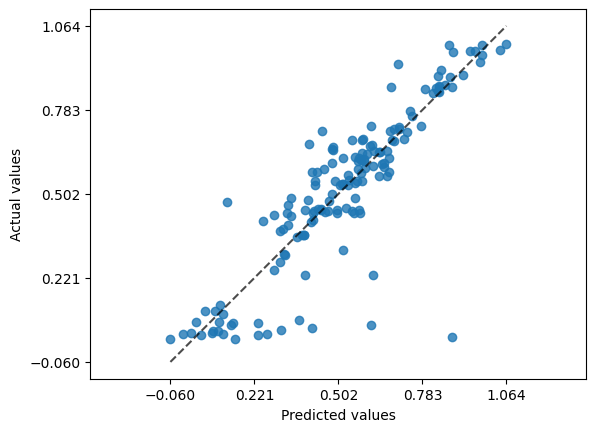

R2 Score: 0.6694759898390427
Mean Absolute Error: 0.08008114348338767
Mean Squared Error: 0.017341207341200735
Mean Absolute Percentage Error: 0.7678647863843381
Mean Absolute Error: 0.046666527314916904
Explained Varaince Score: 0.6829279067323707



In [25]:
print_metrics("Neural Network", model, test_x_t, test_y_t)